In [3]:
# import libraries

import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

# import data
df1 = pd.read_csv('Inflation_Rate.csv')
df2 = pd.read_csv('Min_Wage_Update.csv')
df3 = pd.read_csv('Earnings.csv')
df4 = pd.read_csv('House_Price.csv')
df5 = pd.read_csv('Intrest_Rate.csv')
df6 = pd.read_csv('Labor_Force.csv')
df7 = pd.read_csv('Personal_Consumption.csv')
df8 = pd.read_csv('Production.csv')
df9 = pd.read_csv('Money_Supply.csv')

In [4]:
# combine data sets 

combined1 = pd.merge(df1, df2, on="Year", how="left")
combined2 = pd.merge(combined1, df3, on="Year", how="left")
combined3 = pd.merge(combined2, df4, on="Year", how="left")
combined4 = pd.merge(combined3, df5, on="Year", how="left")
combined5 = pd.merge(combined4, df6, on="Year", how="left")
combined6 = pd.merge(combined5, df7, on="Year", how="left")
combined7 = pd.merge(combined6, df8, on="Year", how="left")
Combined_Data = pd.merge(combined7, df9, on="Year", how="left")
Combined_Data.to_csv("Combined_Data", index=False)
print(Combined_Data)

    Year   IFR  Min_Wage   Earnings  HousePrice  Intrest_Rate  \
0   1978   7.4      2.65  10,556.03       62700          7.93   
1   1979   9.8      2.90  11,479.46       71900         11.19   
2   1980  12.4      3.10  12,513.46       76375         13.36   
3   1981  10.4      3.35  13,773.10       83175         16.38   
4   1982   7.4      3.35  14,531.34       83850         12.26   
5   1983   4.0      3.35  15,239.24       89775          9.09   
6   1984   5.0      3.35  16,135.07       97550         10.23   
7   1985   4.3      3.35  16,822.51      100825          8.10   
8   1986   4.0      3.35  17,321.82      112075          6.81   
9   1987   4.1      3.35  18,426.51      127575          6.66   
10  1988   4.4      3.35  19,334.04      138650          7.57   
11  1989   4.5      3.35  20,099.55      148125          9.22   
12  1990   5.0      4.25  21,027.98      149075          8.10   
13  1991   4.9      4.25  21,811.60      147275          5.69   
14  1992   3.7      4.25 

In [5]:
Combined_Data.head(10)

,Year,IFR,Min_Wage,Earnings,HousePrice,Intrest_Rate,"Labor For (1,000 people)",Consumption,Production,Money Supply
0,1978,7.4,2.65,"10,556.03",62700,7.93,102233,213.3,100.00000,1322.2
1,1979,9.8,2.90,"11,479.46",71900,11.19,104961,226.3,103.05600,1425.7
2,1980,12.4,3.10,"12,513.46",76375,13.36,106974,226.4,99.37534,1540.2
3,1981,10.4,3.35,"13,773.10",83175,16.38,108676,244.0,100.39308,1679.3
4,1982,7.4,3.35,"14,531.34",83850,12.26,110244,253.0,94.92072,1830.9
5,1983,4.0,3.35,"15,239.24",89775,9.09,111515,295.0,99.46263,2054.5
6,1984,5.0,3.35,"16,135.07",97550,10.23,113532,342.2,109.18598,2219.0
7,1985,4.3,3.35,"16,822.51",100825,8.10,115467,380.4,110.95319,2416.5
8,1986,4.0,3.35,"17,321.82",112075,6.81,117846,421.4,113.39013,2612.8
9,1987,4.1,3.35,"18,426.51",127575,6.66,119853,442.0,119.84028,2782.3


In [6]:
# renamed and cleaned data for easy code

Combined_Data.rename(columns={"Consumption":"Consumption (in Billions)"}, inplace=True) # typo
Combined_Data.rename(columns={"Consumption (in Billions)":"Consumption_In_Billions"}, inplace=True)
Combined_Data.rename(columns={"IFR":"Inflation_Rate"}, inplace=True)
Combined_Data.rename(columns={"HousePrice":"IHouse_Price"}, inplace=True)
Combined_Data.rename(columns={"IHouse_Price":"House_Price"}, inplace=True)
Combined_Data.rename(columns={"Labor For (1,000 people)":"Labor_Per_Thousand"}, inplace=True)
Combined_Data.rename(columns={"Money Supply":"Money_Supply"}, inplace=True)

Combined_Data_Cleaned = Combined_Data.replace(',', '', regex=True).astype(float)
df = Combined_Data_Cleaned.dropna()
df.to_csv("Combined_Min_Wage_Data", index=False)

df.head(10)

,Year,Inflation_Rate,Min_Wage,Earnings,House_Price,Intrest_Rate,Labor_Per_Thousand,Consumption_In_Billions,Production,Money_Supply
0,1978.0,7.4,2.65,10556.03,62700.0,7.93,102233.0,213.3,100.00000,1322.2
1,1979.0,9.8,2.90,11479.46,71900.0,11.19,104961.0,226.3,103.05600,1425.7
2,1980.0,12.4,3.10,12513.46,76375.0,13.36,106974.0,226.4,99.37534,1540.2
3,1981.0,10.4,3.35,13773.10,83175.0,16.38,108676.0,244.0,100.39308,1679.3
4,1982.0,7.4,3.35,14531.34,83850.0,12.26,110244.0,253.0,94.92072,1830.9
5,1983.0,4.0,3.35,15239.24,89775.0,9.09,111515.0,295.0,99.46263,2054.5
6,1984.0,5.0,3.35,16135.07,97550.0,10.23,113532.0,342.2,109.18598,2219.0
7,1985.0,4.3,3.35,16822.51,100825.0,8.10,115467.0,380.4,110.95319,2416.5
8,1986.0,4.0,3.35,17321.82,112075.0,6.81,117846.0,421.4,113.39013,2612.8
9,1987.0,4.1,3.35,18426.51,127575.0,6.66,119853.0,442.0,119.84028,2782.3


In [7]:
df.describe()

,Year,Inflation_Rate,Min_Wage,Earnings,House_Price,Intrest_Rate,Labor_Per_Thousand,Consumption_In_Billions,Production,Money_Supply
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,2000.500000,3.613043,5.254348,33100.929565,231350.000000,4.632826,138996.891304,902.165217,167.086685,7080.576087
std,13.422618,2.460588,1.617915,15127.695886,119901.332932,4.020963,19069.818515,505.299288,42.671778,5533.022586
min,1978.000000,1.000000,2.650000,10556.030000,62700.000000,0.080000,102233.000000,213.300000,94.920720,1322.200000
25%,1989.250000,2.100000,3.575000,20331.657500,145325.000000,1.185000,124352.500000,481.475000,126.441730,3096.050000
50%,2000.500000,2.550000,5.150000,32538.370000,208212.500000,4.580000,143177.500000,927.050000,191.485775,5000.500000
75%,2011.750000,4.375000,7.250000,43986.155000,308325.000000,6.772500,154811.000000,1180.650000,204.989180,9867.975000
max,2023.000000,12.400000,7.250000,66621.800000,516425.000000,16.380000,167118.000000,2141.000000,221.617550,21570.700000


In [8]:
corr = df[['Inflation_Rate', 'Min_Wage', 'Earnings', 'House_Price', 'Intrest_Rate', 'Labor_Per_Thousand', 'Consumption_In_Billions', 'Production', 'Money_Supply']].corr()
corr

,Inflation_Rate,Min_Wage,Earnings,House_Price,Intrest_Rate,Labor_Per_Thousand,Consumption_In_Billions,Production,Money_Supply
Inflation_Rate,1.000000,-0.614765,-0.532913,-0.483237,0.818410,-0.698782,-0.492368,-0.717605,-0.345606
Min_Wage,-0.614765,1.000000,0.944662,0.904797,-0.836804,0.954128,0.891497,0.874847,0.862703
Earnings,-0.532913,0.944662,1.000000,0.990072,-0.775763,0.960898,0.988704,0.870090,0.960024
House_Price,-0.483237,0.904797,0.990072,1.000000,-0.737498,0.939952,0.991444,0.852481,0.962527
Intrest_Rate,0.818410,-0.836804,-0.775763,-0.737498,1.000000,-0.857703,-0.735246,-0.813038,-0.658127
Labor_Per_Thousand,-0.698782,0.954128,0.960898,0.939952,-0.857703,1.000000,0.937068,0.952827,0.849752
Consumption_In_Billions,-0.492368,0.891497,0.988704,0.991444,-0.735246,0.937068,1.000000,0.858159,0.960621
Production,-0.717605,0.874847,0.870090,0.852481,-0.813038,0.952827,0.858159,1.000000,0.709125
Money_Supply,-0.345606,0.862703,0.960024,0.962527,-0.658127,0.849752,0.960621,0.709125,1.000000


In [9]:
results1 = smf.ols('Inflation_Rate ~ Min_Wage+Earnings+House_Price+Intrest_Rate+Labor_Per_Thousand+Consumption_In_Billions+Production+Money_Supply', data=df).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Inflation_Rate   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     25.23
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           9.26e-13
Time:                        11:23:51   Log-Likelihood:                -63.294
No. Observations:                  46   AIC:                             144.6
Df Residuals:                      37   BIC:                             161.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  23.7978     10.503      2.266      0.029       2.517      45.079
Min_Wage                    1.5788      0.857      1.841      0.074      -0.159       3.316
Earnings                   -0.0003      0.000     -0.768      0.447      -0.001       0.000
House_Price               2.64e-05   1.34e-05      1.971      0.056   -7.45e-07    5.35e-05
Intrest_Rate                0.3715      0.097      3.826      0.000       0.175       0.568
Labor_Per_Thousand         -0.0002      0.000     -2.097      0.043      -0.000   -7.91e-06
Consumption_In_Billions     0.0037      0.006      0.650      0.520      -0.008       0.015
Production                  0.0072      0.026      0.274      0.786      -0.046       0.060
Money_Supply                0.0001      0.000      0.220      0.827      -0.001       0.001
==============================================================================
Omnibus:                       12.224   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               19.683
Skew:                           0.712   Prob(JB):                     5.32e-05
Kurtosis:                       5.871   Cond. No.                     1.97e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# first regression had too many insignificant variables, trimmed it down
results2 = smf.ols('Inflation_Rate ~ Min_Wage+House_Price+Intrest_Rate+Labor_Per_Thousand', data=df).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Inflation_Rate   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     53.48
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           9.78e-16
Time:                        11:23:51   Log-Likelihood:                -64.153
No. Observations:                  46   AIC:                             138.3
Df Residuals:                      41   BIC:                             147.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             24.3821      4.353      5.601      0.000      15.591      33.173
Min_Wage               0.9150      0.323      2.828      0.007       0.262       1.568
House_Price         2.267e-05   4.13e-06      5.488      0.000    1.43e-05     3.1e-05
Intrest_Rate           0.3571      0.082      4.348      0.000       0.191       0.523
Labor_Per_Thousand    -0.0002   3.95e-05     -5.917      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       13.826   Durbin-Watson:                   0.877
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.188
Skew:                           0.739   Prob(JB):                     2.06e-06
Kurtosis:                       6.388   Cond. No.                     8.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# lag dependent variable to deal with time-series issues
df_copy=df.copy()
df_copy['Inflation_Lag1'] = df_copy['Inflation_Rate'].shift(1)
results3 = smf.ols('Inflation_Rate ~ Inflation_Lag1+Min_Wage+House_Price+Intrest_Rate+Labor_Per_Thousand', data=df_copy).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Inflation_Rate   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     47.17
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           1.66e-15
Time:                        11:23:51   Log-Likelihood:                -59.189
No. Observations:                  45   AIC:                             130.4
Df Residuals:                      39   BIC:                             141.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             16.0885      5.367      2.998      0.005       5.232      26.944
Inflation_Lag1         0.4048      0.146      2.766      0.009       0.109       0.701
Min_Wage               0.4651      0.344      1.354      0.184      -0.230       1.160
House_Price         1.653e-05   4.58e-06      3.605      0.001    7.26e-06    2.58e-05
Intrest_Rate           0.1856      0.105      1.773      0.084      -0.026       0.397
Labor_Per_Thousand    -0.0002   4.93e-05     -3.079      0.004      -0.000   -5.21e-05
==============================================================================
Omnibus:                       15.757   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.051
Skew:                           0.635   Prob(JB):                     1.00e-10
Kurtosis:                       7.790   Cond. No.                     1.10e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

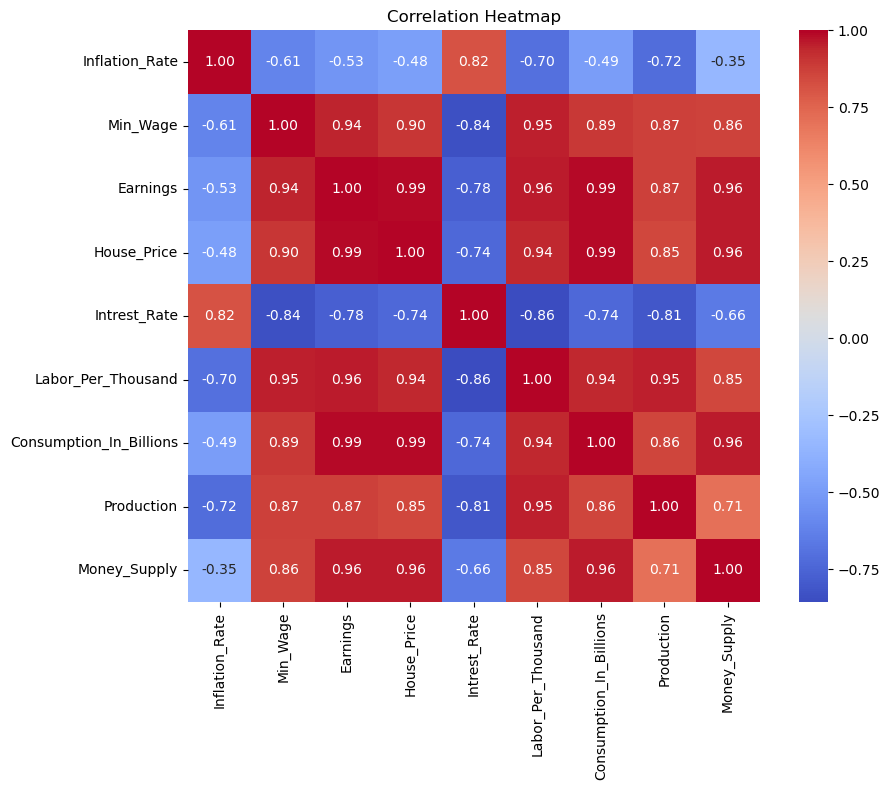

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

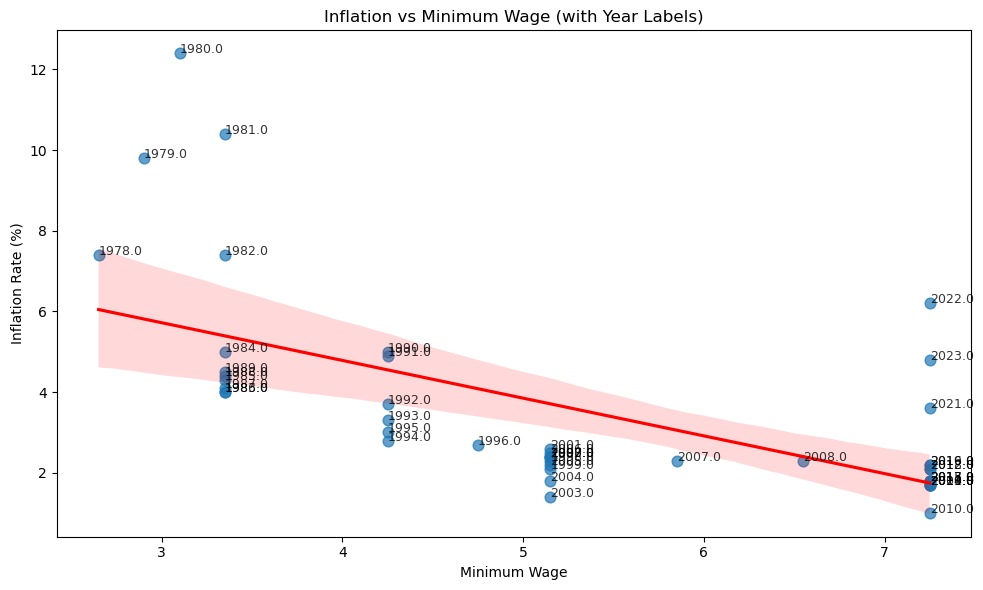

In [14]:
plt.figure(figsize=(10, 6))

sns.regplot(
    x="Min_Wage",
    y="Inflation_Rate",
    data=df,
    ci=95,
    scatter_kws={"s": 60, "alpha": 0.7},
    line_kws={"color": "red"}
)

for i in range(len(df)):
    plt.text(
        df["Min_Wage"].iloc[i],
        df["Inflation_Rate"].iloc[i],
        str(df["Year"].iloc[i]),
        fontsize=9,
        alpha=0.8
    )
    

plt.xlabel("Minimum Wage")
plt.ylabel("Inflation Rate (%)")
plt.title("Inflation vs Minimum Wage (with Year Labels)")

plt.tight_layout()
plt.show()
